# Install enviroment

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install tensorflow
!pip install collection
!apt-get install swig -y
!pip install numpy
!pip install matplotlib
!pip install opencv-python
!git clone https://github.com/gsethi2409/tf-pose-estimation
!pip install -r tf-pose-estimation/requirements.txt
!pip install ffmpeg-python

  Created wheel for collection: filename=collection-0.1.6-cp36-none-any.whl size=5116 sha256=1c52f875d2ab9e795cbe194990fdb475aee793ff865f8e691349319bdbadb4b7
  Stored in directory: /root/.cache/pip/wheels/9e/f2/2b/a611b0dc83b770763e7962500ef158c09dc8161d3fce6e73de
Successfully built collection
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (839 kB/s)
Selecting previously un

In [3]:
cd tf-pose-estimation/tf_pose/pafprocess/

/content/tf-pose-estimation/tf_pose/pafprocess


In [4]:
!swig -python -c++ pafprocess.i && python setup.py build_ext --inplace

running build_ext
building '_pafprocess' extension
swigging pafprocess.i to pafprocess_wrap.cpp
swig -python -c++ -o pafprocess_wrap.cpp pafprocess.i
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I. -I/usr/include/python3.6m -c pafprocess.cpp -o build/temp.linux-x86_64-3.6/pafprocess.o
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I. -I/usr/include/python3.6m -c pafprocess_wrap.cpp -o build/temp.linux-x86_64-3.6/pafprocess_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protecto

In [5]:
!pip install git+https://github.com/adrianc-a/tf-slim.git@remove_contrib

  Cloning https://github.com/adrianc-a/tf-slim.git (to revision remove_contrib) to /tmp/pip-req-build-a3h7y_cd
  Running command git clone -q https://github.com/adrianc-a/tf-slim.git /tmp/pip-req-build-a3h7y_cd
  Running command git checkout -b remove_contrib --track origin/remove_contrib
  Switched to a new branch 'remove_contrib'
  Branch 'remove_contrib' set up to track remote branch 'remove_contrib' from 'origin'.
  Created wheel for tf-slim: filename=tf_slim-1.0-cp36-none-any.whl size=275049 sha256=71748eac2d68977114049bcffc4a8cb692c33b89ee4942a36dda49f2d9f86e3b
  Stored in directory: /tmp/pip-ephem-wheel-cache-_2bjgbr1/wheels/be/41/65/cd259010573e2dd0fba258f9a466059b48e38118aeec65e09f
Successfully built tf-slim


In [6]:
cd ../..

/content/tf-pose-estimation


# Play around with Open-pose function

In [7]:
import sys
sys.path.append('.')
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
from imutils import paths
import os
import random
import ffmpeg
import imutils
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import scipy.ndimage.interpolation as inter
from scipy.signal import medfilt 
from scipy.spatial.distance import cdist
from google.colab.patches import cv2_imshow


2021-01-17 08:05:23,534 INFO Generating grammar tables from /usr/lib/python3.6/lib2to3/Grammar.txt
2021-01-17 08:05:23,558 INFO Generating grammar tables from /usr/lib/python3.6/lib2to3/PatternGrammar.txt


In [8]:
model='mobilenet_v2_large'
#show_process = True # for debug purpose, if enabled, speed for inference is dropped.
#logger.debug('initialization %s : %s' % (model, get_graph_path(model)))
#1920x1040
resolution='432x368' 
w, h = model_wh(resolution)
e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2021-01-17 08:05:23,635] [TfPoseEstimator] [INFO] loading graph from /content/tf-pose-estimation/models/graph/mobilenet_v2_large/graph_opt.pb(default size=432x368)
2021-01-17 08:05:23,635 INFO loading graph from /content/tf-pose-estimation/models/graph/mobilenet_v2_large/graph_opt.pb(default size=432x368)


TfPoseEstimator/image
TfPoseEstimator/MobilenetV2/Conv/BatchNorm/Const
TfPoseEstimator/MobilenetV2/Conv/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv/depthwise/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv/depthwise/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv/project/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv/project/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_1/expand/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv_1/expand/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_1/depthwise/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv_1/depthwise/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_1/project/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv_1/project/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_2/expand/BatchNorm/Const
TfPoseEstimator/MobilenetV2/expanded_conv_2/expand/BatchNorm/Const_1
TfPoseEstimator/MobilenetV2/expanded_conv_2/depthwise/

Shape:  (408, 612, 3)


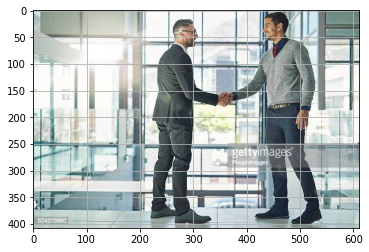

In [ ]:
image_path = '/content/test.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.grid();
print('Shape: ', image.shape)

In [ ]:
image = common.read_imgfile(image_path, None, None)
image.shape

(408, 612, 3)

In [ ]:
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

In [ ]:
e.heatMat[0][0]

array([4.0648965e-04, 9.1164839e-06, 2.9467652e-04, 2.6485164e-04,
       4.0501426e-04, 4.8653421e-04, 4.9652683e-04, 3.2602833e-04,
       8.2254381e-04, 4.3605483e-04, 1.5332742e-04, 2.3749738e-03,
       5.9958128e-04, 1.0786258e-04, 7.7164266e-05, 1.0627025e-04,
       7.6217751e-05, 1.4231668e-04, 9.8888600e-01], dtype=float32)

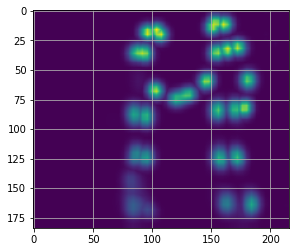

In [ ]:
max_prob = np.amax(e.heatMat[:, :, :-1], axis=2)
plt.imshow(max_prob)
plt.grid();

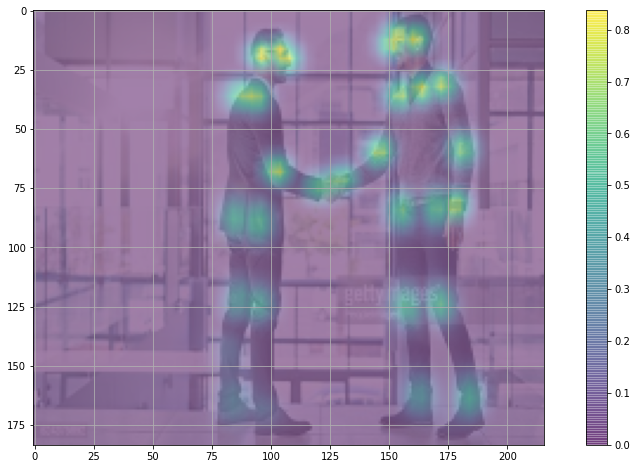

In [ ]:
plt.figure(figsize=(15,8))
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)
plt.imshow(bgimg, alpha=0.5)
plt.imshow(max_prob, alpha=0.5)
plt.colorbar()
plt.grid();

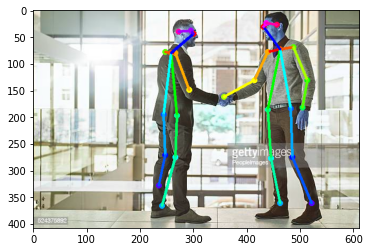

In [ ]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
plt.imshow(image)

In [ ]:

cv2.putText(image, 'bat_tay', (int(0.70*image.shape[1]), int(0.08*image.shape[0] - int(0.08*image.shape[0] //2))),
          cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1)
cv2.putText(image, 'bat_tay', (int(0.49*image.shape[1]), int(0.1*image.shape[0]) - int(0.1*image.shape[0] // 2)),
          cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1)

array([[[191, 196, 175],
        [224, 229, 208],
        [239, 241, 221],
        ...,
        [120, 120,  96],
        [120, 120,  96],
        [120, 120,  96]],

       [[193, 198, 177],
        [226, 231, 210],
        [241, 243, 223],
        ...,
        [119, 119,  95],
        [119, 119,  95],
        [119, 119,  95]],

       [[194, 196, 176],
        [227, 229, 209],
        [241, 242, 222],
        ...,
        [119, 119,  95],
        [119, 119,  95],
        [119, 119,  95]],

       ...,

       [[195, 199, 180],
        [193, 197, 178],
        [193, 197, 178],
        ...,
        [191, 196, 181],
        [199, 204, 189],
        [204, 209, 194]],

       [[191, 196, 175],
        [188, 193, 172],
        [190, 195, 174],
        ...,
        [197, 202, 187],
        [203, 208, 193],
        [206, 211, 196]],

       [[193, 198, 177],
        [191, 196, 175],
        [194, 199, 178],
        ...,
        [197, 202, 187],
        [200, 205, 190],
        [199, 204, 189]]

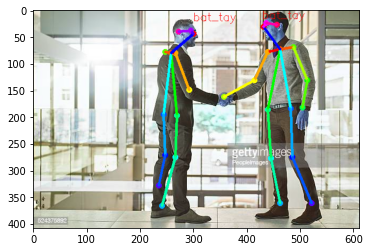

In [ ]:
plt.imshow(image)

2021-01-16 04:49:49,630 WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


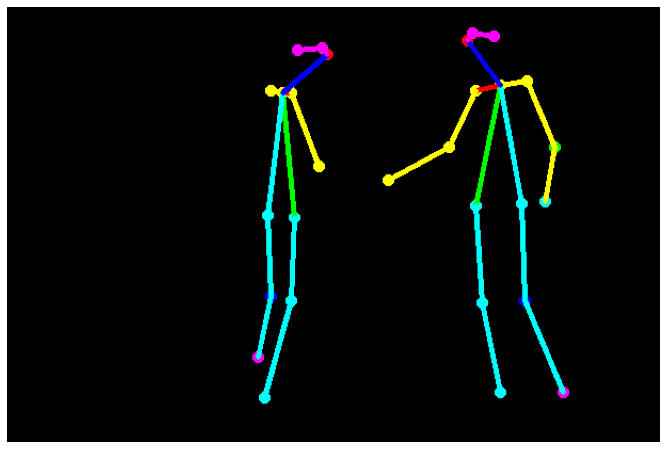

In [ ]:
image = common.read_imgfile(image_path, None, None)
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
black_background = np.zeros(image.shape)
skeleton = TfPoseEstimator.draw_humans(black_background, humans, imgcopy=False)
plt.figure(figsize=(15,8))
plt.imshow(skeleton);
plt.grid(); 
plt.axis('off');

In [9]:
def show_keypoints(image, hum, human=1, color='orange', showBG = True):
    if human == 0: human = 1
    num_hum = len(hum)
    keypoints = str(str(str(hum[human-1]).split('BodyPart:')[1:]).split('-')).split(' score=')
    keypoints_list=[]
    for i in range (len(keypoints)-1): 
        pnt = keypoints[i][-11:-1]
        pnt = tuple(map(float, pnt.split(', ')))
        keypoints_list.append(pnt)

    keypts_array = np.array(keypoints_list)
    keypts_array = keypts_array*(image.shape[1],image.shape[0])
    keypts_array = keypts_array.astype(int)
    keypts_array

    plt.figure(figsize=(10,10))
    plt.axis([0, image.shape[1], 0, image.shape[0]])  
    plt.scatter(*zip(*keypts_array), s=200, color=color, alpha=0.6)
    if showBG:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      
    plt.imshow(image)
    ax=plt.gca() 
    ax.set_ylim(ax.get_ylim()[::-1]) 
    ax.xaxis.tick_top() 
    plt.title('Keypoints Person [{}] from {} humans detected\n'.format(human, num_hum))
    plt.grid();

    for i, txt in enumerate(keypts_array):
        ax.annotate(i, (keypts_array[i][0]-5, keypts_array[i][1]+5))
            
    return keypts_array


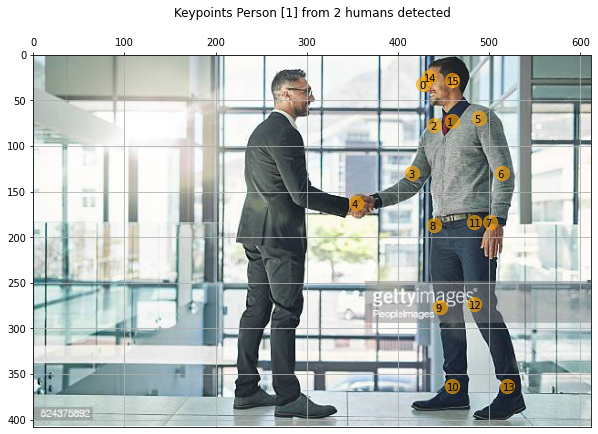

In [ ]:
keypts_array = show_keypoints(image, humans)

# Model

In [10]:
import tensorflow as tf
def poses_diff(x):
    H, W = x.get_shape()[1],x.get_shape()[2]
    x = tf.subtract(x[:,1:,...],x[:,:-1,...])
    x = tf.image.resize(x,size=[H,W]) 
    return x

def pose_motion(P,frame_l):
    P_diff_slow = Lambda(lambda x: poses_diff(x))(P)
    P_diff_slow = Reshape((frame_l,-1))(P_diff_slow)
    P_fast = Lambda(lambda x: x[:,::2,...])(P)
    P_diff_fast = Lambda(lambda x: poses_diff(x))(P_fast)
    P_diff_fast = Reshape((int(frame_l/2),-1))(P_diff_fast)
    return P_diff_slow,P_diff_fast
    
def c1D(x,filters,kernel):
    x = Conv1D(filters, kernel_size=kernel,padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def block(x,filters):
    x = c1D(x,filters,3)
    x = c1D(x,filters,3)
    return x
    
def d1D(x,filters):
    x = Dense(filters,use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def build_FM(frame_l=32,joint_n=22,joint_d=2,feat_d=231,filters=16):   
    M = Input(shape=(frame_l,feat_d))
    P = Input(shape=(frame_l,joint_n,joint_d))
    
    diff_slow,diff_fast = pose_motion(P,frame_l)
    
    x = c1D(M,filters*2,1)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,3)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,1)
    x = MaxPooling1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x_d_slow = c1D(diff_slow,filters*2,1)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,3)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,1)
    x_d_slow = MaxPool1D(2)(x_d_slow)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
        
    x_d_fast = c1D(diff_fast,filters*2,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,3) 
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,1) 
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
   
    x = concatenate([x,x_d_slow,x_d_fast])
    x = block(x,filters*2)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)
    
    x = block(x,filters*4)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*8)
    x = SpatialDropout1D(0.1)(x)
    
    return Model(inputs=[M,P],outputs=x)


def build_DD_Net(C):
    M = Input(name='M', shape=(C.frame_l,C.feat_d))  
    P = Input(name='P', shape=(C.frame_l,C.joint_n,C.joint_d)) 
    
    FM = build_FM(C.frame_l,C.joint_n,C.joint_d,C.feat_d,C.filters)
    
    x = FM([M,P])

    x = GlobalMaxPool1D()(x)
    
    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = Dense(C.clc_num, activation='softmax')(x)
    
    ######################Self-supervised part
    model = Model(inputs=[M,P],outputs=x)
    return model

# Preprocessing

In [11]:
random.seed(1234)

class Config():
    def __init__(self):
        self.frame_l = 16 # the length of frames
        self.joint_n = 14 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 6 # the number of class
        self.feat_d = 91
        self.filters = 64
        # (433, 32, 105)
C = Config()

In [107]:
def get_skeleton_coor(human, flag=False):
  dict_coor = {}
  for index, body in enumerate(human):
    tmp_coor = []
    for key, val in body.body_parts.items():
      if key in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]:
        tmp_coor.append([val.x, val.y])
    if len(tmp_coor) == 14:
      tmp_coor = open2ntu_pose(np.array(tmp_coor))
      dict_coor[f'body_{index}'] = tmp_coor.flatten()
      flag = True
  return dict_coor, flag

#TODO swap skeleton for DD-net

def zoom(p,target_l=64,joints_num=25,joints_dim=3):
    l = p.shape[0]
    p_new = np.empty([target_l, joints_num,joints_dim]) 
    for m in range(joints_num):
        for n in range(joints_dim):
            p[:, m,n] = medfilt(p[:,m,n], 3)
            p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]      
    return p_new

# Calculate JCD feature
def norm_scale(x):
    return (x-np.mean(x))/np.mean(x)
  
def get_CG(p,C):
    M = []
    iu = np.triu_indices(C.joint_n,1,C.joint_n)
    for f in range(C.frame_l): 
        d_m = cdist(p[f],p[f],'euclidean')       
        d_m = d_m[iu] 
        M.append(d_m)
    M = np.stack(M) 
    M = norm_scale(M)
    return M

def data_generator(skeleton_16, C): #n frame -> X_0, X_1
    X_0 = []
    X_1 = []

    # for i in tqdm(range(len(T))): 
    p = np.copy(skeleton_16)
    p = zoom(p, target_l=C.frame_l, joints_num=C.joint_n, joints_dim=C.joint_d)
    M = get_CG(p, C)

    X_0.append(M)
    X_1.append(p)

    X_0 = np.stack(X_0)  
    X_1 = np.stack(X_1) 

    return X_0, X_1

def open2ntu_pose(pose_18_joints):
  """
  pose_18_joints: array with shape (n_frames, 18 joints, 2 coords)
  """
  picked_joints = [0, 5, 6, 7, 2, 3, 4, 11, 12, 13, 8, 9, 10, 1]
  return pose_18_joints[picked_joints]

# For predict video action and save 

In [13]:
import joblib
# lst_video = list(paths.list_files('/content/drive/MyDrive/dataset/action_videos/datavatva/'))
showBG = True
# model = joblib.load('/content/drive/MyDrive/Dataset/xgb_30_combine.pkl') #combine

In [ ]:
# lst_video = [s for s in lst_video if ".mp4" in s]

In [14]:
#check rotation
def check_rotation(path_video_file):
     # this returns meta-data of the video file in form of a dictionary
     meta_dict = ffmpeg.probe(path_video_file)

     # from the dictionary, meta_dict['streams'][0]['tags']['rotate'] is the key
     # we are looking for
     rotateCode = None
     if int(meta_dict['streams'][0]['tags']['rotate']) == 90:
         rotateCode = cv2.ROTATE_90_CLOCKWISE
     elif int(meta_dict['streams'][0]['tags']['rotate']) == 180:
         rotateCode = cv2.ROTATE_180
     elif int(meta_dict['streams'][0]['tags']['rotate']) == 270:
         rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE
         
     return rotateCode

def correct_rotation(frame, rotateCode):  
     return cv2.rotate(frame, rotateCode) 

def norm_inner_feat(X):
  temp_X = X - X[:, :, 0, :].reshape(X.shape[0], X.shape[1], 1, X.shape[-1])
  return temp_X[:, :, 1:, :]

def norm_outer_feat(X, fps=15):
  n_samples = X.shape[0]
  n_frame = X.shape[1]
  n_joint = X.shape[2]
  v = np.zeros((n_samples, n_frame - 1, n_joint, 2))
  time = 1 / fps
  for n in range(n_samples):
      for f in range(n_frame-1):
          v[n,f] = (X[n,f+1] - X[n,f]) / time
  return v
    
ACTION_MAP_ID = {
    5: 'Sit down', # sit down
    0: 'Stand up', # stand up
    1: 'Jump', # jump
    2: 'Shaking hands', # hand shake
    3: 'Walking towards',
    4: 'Walking apart'}

In [106]:
#load model
from keras.models import load_model
DD_Net = load_model('/content/drive/MyDrive/Dataset/2d_96_acc_16_frames.h5')

In [244]:
#for save video visualize
video_path = '/content/drive/MyDrive/Dataset/IMG_4610.MOV'
showBG = True
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH ))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT ))

try:
  rotateCode = check_rotation(video_path)
except:
  rotateCode = None

if cap.isOpened() is False:
  print('Error opening video stream or file')

fps_time = 0
out = cv2.VideoWriter('/content/drive/MyDrive/Dataset/demo_new_06.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))

body_dict_concat = {}
body_dict_concat_2 = {}
image_array = []
label_default = '' 
while True:
     
    ret_val, image = cap.read()
    if rotateCode is not None:
         image = correct_rotation(image, rotateCode)

    try:
      humans = e.inference(image,
                          resize_to_default=(w > 0 and h > 0),
                          upsample_size=4.0)
    except:
      break
    if not showBG:
      image = np.zeros(image.shape)

    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    cv2.putText(image, "FPS: %f" % (1.0 / (time.time() - fps_time)), (30, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # #get x,y coordinate
    lst_location = []
    for i in humans:
      try:
        lst_location.append([i.body_parts[0].x, i.body_parts[0].y])
      except:
        pass

    #get keypoint of every people in a frame
    body_keypoint_coor_dict, flag = get_skeleton_coor(humans)
    if flag:
      image_array.append(image)

    #append these skeleton to a dict of all people skeleton
    for body, val in body_keypoint_coor_dict.items():
      if body not in body_dict_concat:
        body_dict_concat[body] = val
        body_dict_concat_2[body] = val
      else:
        try:
          temp_val = np.concatenate([body_dict_concat[body], val], axis=0)
          temp_val_pred = np.concatenate([body_dict_concat_2[body], val], axis=0)
        except:
          break
        body_dict_concat[body] = temp_val
        body_dict_concat_2[body] = temp_val_pred


    #if any body is equal to 16 -> predict label
    count = 0
    for body, val in body_dict_concat.items():
      if len(val) == 896: #4032: #448
        # val_16frame = val.reshape(16, 14, 2)
        x, y = val_16frame[-1][0]
        #normalize data for 16 frames
        X_0, X_1 = data_generator(val.reshape(-1,14,2), C)
        val_pred = np.argmax(DD_Net.predict([X_0, X_1]))
        label_default = ACTION_MAP_ID[val_pred]
        print(label_default)
        body_dict_concat[body] = []
        #write label to frames
        cv2.putText(image, f'[{label_default}]', (int(x*width-70), int(y*height - int(y*height //2))), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)
      else:
        try:
          # label_default = ''
          cv2.putText(image, f'[{label_default}]', (int(lst_location[count][0]*width-70), int(lst_location[count][1]*height - int(lst_location[count][1]*height //2))), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)
        except:
          pass
      count += 1

    #write to video
    out.write(image)
    fps_time = time.time()
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break
out.release()
cap.release()
cv2.destroyAllWindows()

# np.save('/content/drive/MyDrive/Action_recognize/image_arr_66.npy', np.asarray(image_array))
# np.save('/content/drive/MyDrive/Action_recognize/skeleton_66.npy', body_dict_concat_2['body_0'].reshape(-1, 14, 2))

Shaking hands
Shaking hands
Shaking hands
Shaking hands
Walking apart
Walking apart
Stand up
Sit down
Walking towards
Walking towards
Walking apart
Walking towards
Walking apart
Walking apart
Walking towards
Walking towards
Walking apart
Walking towards
Jump
Walking towards
Walking towards
Walking apart
Walking towards
Walking apart
Walking apart
Jump
Jump
Shaking hands
Walking apart
Walking apart
Walking towards
Walking towards
Walking towards
Shaking hands
Shaking hands
Shaking hands
Shaking hands
Shaking hands
Walking apart
Shaking hands
Walking apart
Walking towards
Shaking hands
Shaking hands
Walking apart
Walking apart
Walking towards
Walking apart
Walking towards
Shaking hands
Shaking hands
Walking towards
Walking apart
Walking apart
Shaking hands
Shaking hands
Shaking hands
Walking apart
Walking apart
Shaking hands
Shaking hands
Walking towards
Walking apart
Sit down


In [241]:
 16 * 2 * 14 * 2

896

In [243]:
body_dict_concat_2['body_0'].reshape(-1, 14, 2).shape

(160, 14, 2)

In [85]:
X_0, X_1 = data_generator(body_dict_concat_2['body_0'].reshape(-1, 14, 2), C)

In [86]:
val_pred = np.argmax(DD_Net.predict([X_0, X_1]))
label_default = ACTION_MAP_ID[val_pred]
label_default

'Walking apart'

# For predict video action and save 

In [ ]:
import joblib
# lst_video = list(paths.list_files('/content/drive/MyDrive/dataset/action_videos/datavatva/'))
showBG = True
# model = joblib.load('/content/drive/MyDrive/Dataset/xgb_30_combine.pkl') #combine

In [ ]:
# lst_video = [s for s in lst_video if ".mp4" in s]

In [ ]:
#check rotation
def check_rotation(path_video_file):
     # this returns meta-data of the video file in form of a dictionary
     meta_dict = ffmpeg.probe(path_video_file)

     # from the dictionary, meta_dict['streams'][0]['tags']['rotate'] is the key
     # we are looking for
     rotateCode = None
     if int(meta_dict['streams'][0]['tags']['rotate']) == 90:
         rotateCode = cv2.ROTATE_90_CLOCKWISE
     elif int(meta_dict['streams'][0]['tags']['rotate']) == 180:
         rotateCode = cv2.ROTATE_180
     elif int(meta_dict['streams'][0]['tags']['rotate']) == 270:
         rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE
         
     return rotateCode

def correct_rotation(frame, rotateCode):  
     return cv2.rotate(frame, rotateCode) 

def norm_inner_feat(X):
  temp_X = X - X[:, :, 0, :].reshape(X.shape[0], X.shape[1], 1, X.shape[-1])
  return temp_X[:, :, 1:, :]

def norm_outer_feat(X, fps=15):
  n_samples = X.shape[0]
  n_frame = X.shape[1]
  n_joint = X.shape[2]
  v = np.zeros((n_samples, n_frame - 1, n_joint, 2))
  time = 1 / fps
  for n in range(n_samples):
      for f in range(n_frame-1):
          v[n,f] = (X[n,f+1] - X[n,f]) / time
  return v
    
ACTION_MAP_ID = {
    5: 'Sit down', # sit down
    0: 'Stand up', # stand up
    1: 'Jump', # jump
    2: 'Shaking hands', # hand shake
    3: 'Walking towards',
    4: 'Walking apart'}

In [ ]:
#load model
from keras.models import load_model
DD_Net = load_model('/content/drive/MyDrive/Dataset/2d_96_acc_16_frames.h5')

In [ ]:
#for save video visualize
video_path = '/content/drive/MyDrive/Action_recognize/IMG_5054.MOV'
showBG = True
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH ))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT ))

try:
  rotateCode = check_rotation(video_path)
except:
  rotateCode = None

if cap.isOpened() is False:
  print('Error opening video stream or file')

fps_time = 0
out = cv2.VideoWriter('/content/drive/MyDrive/Dataset/demo_new_00.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))

body_dict_concat = {}
body_dict_concat_2 = {}
label_default = '' 
while True:
     
    ret_val, image = cap.read()
    if rotateCode is not None:
         image = correct_rotation(image, rotateCode)

    try:
      humans = e.inference(image,
                          resize_to_default=(w > 0 and h > 0),
                          upsample_size=4.0)
    except:
      break
    if not showBG:
      image = np.zeros(image.shape)

    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    cv2.putText(image, "FPS: %f" % (1.0 / (time.time() - fps_time)), (30, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # #get x,y coordinate
    lst_location = []
    for i in humans:
      try:
        lst_location.append([i.body_parts[0].x, i.body_parts[0].y])
      except:
        pass

    #get keypoint of every people in a frame
    body_keypoint_coor_dict = get_skeleton_coor(humans)

    #append these skeleton to a dict of all people skeleton
    for body, val in body_keypoint_coor_dict.items():
      if body not in body_dict_concat:
        body_dict_concat[body] = val
        body_dict_concat_2[body] = val
      else:
        try:
          temp_val = np.concatenate([body_dict_concat[body], val], axis=0)
          temp_val_pred = np.concatenate([body_dict_concat_2[body], val], axis=0)
        except:
          break
        body_dict_concat[body] = temp_val
        body_dict_concat_2[body] = temp_val_pred


    #if any body is equal to 16 -> predict label
    count = 0
    for body, val in body_dict_concat.items():
      if len(val) == 448:
        val_16frame = val.reshape(16, 14, 2)
        x, y = val_16frame[-1][0]
        #normalize data for 16 frames
        X_0, X_1 = data_generator(val_16frame, C)
        val_pred = np.argmax(DD_Net.predict([X_0, X_1]))
        label_default = ACTION_MAP_ID[val_pred]
        body_dict_concat[body] = []
        #write label to frames
        cv2.putText(image, f'[{label_default}]', (int(x*width-70), int(y*height - int(y*height //2))), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)
      else:
        try:
          cv2.putText(image, f'[{label_default}]', (int(lst_location[count][0]*width-70), int(lst_location[count][1]*height - int(lst_location[count][1]*height //2))), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)
        except:
          pass
      count += 1

    #write to video
    out.write(image)
    fps_time = time.time()
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break
out.release()
cap.release()
cv2.destroyAllWindows()

In [ ]:
body_dict_concat_2['body_0'].reshape(-1, 14, 2).shape

(76, 14, 2)

In [ ]:
X_0, X_1 = data_generator(body_dict_concat_2['body_0'].reshape(-1, 14, 2), C)

In [ ]:
val_pred = np.argmax(DD_Net.predict([X_0, X_1]))
label_default = ACTION_MAP_ID[val_pred]
label_default

'Jump'

# For debug predict

In [ ]:
data = np.load('/content/S010C001P016R002A059.skeleton.npy', allow_pickle=True).item()
indexs = []
for idx, x in enumerate(data['rgb_body0']):
  if ((x[:,0] >=1920 ).sum() >0) or ((x[:,1] >=1 ).sum() >= 1080) or np.isnan(x[:,0]).any() or np.isnan(x[:,1]).any():
      indexs.append(idx)
  
#             data['rgb_body0'][idx] = get_14_keypoints(data['rgb_body0'][idx])
  
  data['rgb_body0'][idx][:,1] /=1080

data['rgb_body0'] = np.delete(data['rgb_body0'], indexs, axis=0)
x1, x2 = data_generator(data['rgb_body0'], C)
np.argmax(DD_Net.predict([x1,x2]))

# Extract to csv for training

In [ ]:
#for extract csv file


df = pd.DataFrame(columns=['file_name', 'frame', 'key_point_0', 'key_point_1', 'key_point_2', 'key_point_3', 'key_point_4', 'key_point_5', 'key_point_6', 'key_point_7', 'key_point_8', 'key_point_9', 'key_point_10', 'key_point_11', 'key_point_12', 'key_point_13'])
for video_path in tqdm(lst_video[:-6]):

  cap = cv2.VideoCapture(video_path)

  try:
    rotateCode = check_rotation(video_path)
  except:
    rotateCode = None

  if cap.isOpened() is False:
    print('Error opening video stream or file')

  file_name = os.path.basename(video_path).split('.mp4')[0]
  coor_arr = []
  coor_dict = defaultdict(list)
  frame = 1
  # frame = frame

  while True:
      ret_val, image = cap.read()

      if rotateCode is not None:
        image = correct_rotation(image, rotateCode)
      #run model to extract keypoints of body
      try:
        humans = e.inference(image,
                            resize_to_default=(w > 0 and h > 0),
                            upsample_size=4.0)
      except:
        break
      #preporcess to get x,y coordinate  
      if len(humans) >= 1:
        lst_str = str(humans[0]).split('BodyPart:')
        temp_arr = []
        for coor in lst_str:
          if coor:
            key_point = int(coor.split('-')[0])
            if key_point in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]:
              temp_arr.append(coor[coor.find("(") + 1 : coor.find(")")].split(','))
        if len(temp_arr)  < 14:
          continue
        else:
          coor_dict[file_name].append([frame, temp_arr])
      frame += 1
  cap.release()

  #save to csv file
  len_df = len(df)
  for key, values in coor_dict.items():
    for index, val in enumerate(values):
      df.loc[index + len_df] = [key, val[0], val[1][0], val[1][1], val[1][2], val[1][3], val[1][4], val[1][5], val[1][6], val[1][7], val[1][8], val[1][9], val[1][10], val[1][11], val[1][12], val[1][13]]
print('Extract data completed !')

In [ ]:
df.to_csv('/content/drive/MyDrive/VinBigdata - PythonBasic/huy_data.csv', index=False)